In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [4]:
titanic = pd.read_csv(url)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.shape

(891, 12)

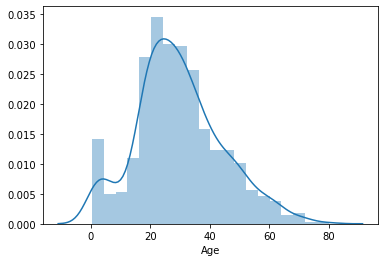

In [9]:
sb.distplot(a = titanic["Age"].dropna())

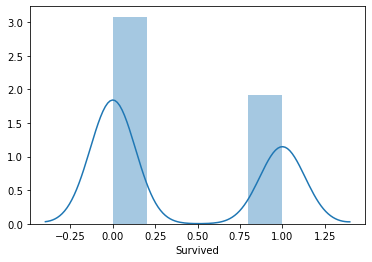

In [10]:
sb.distplot(a = titanic["Survived"])

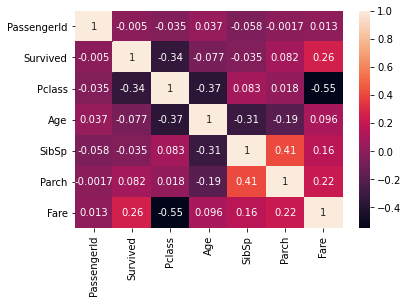

In [11]:
corr = titanic.corr()
sb.heatmap(corr,annot=True)

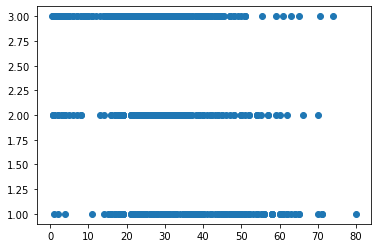

In [12]:
plt.scatter(titanic["Age"],titanic["Pclass"])

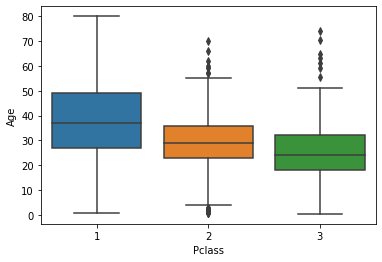

In [13]:
sb.boxplot(x="Pclass" , y = "Age" , data=titanic)

In [14]:
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
             return 37
        elif Pclass == 2:
             return 29
        else:
            return 24
    else:
        return Age

In [15]:
 titanic["Age"] = titanic[['Age' , 'Pclass']].apply(impute_Age,axis=1)       

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic[["Pclass","Sex","Age","SibSp","Parch","Fare"]].head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [18]:
Sex = pd.get_dummies(titanic["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
titanic.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [20]:
titanic.drop(["Sex"],axis=1,inplace=True)

In [21]:
titanic = pd.concat([titanic,Sex],axis=1)

In [22]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [23]:
y=titanic["Survived"]

In [24]:
x=titanic.drop(['Survived'],axis=1)

In [25]:
x

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,24.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.30,random_state = 0)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tm = DecisionTreeClassifier()

In [30]:
tm.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
tm.score(x_train,y_train)

0.9791332263242376

In [32]:
tm_pred = tm.predict(x_test)

In [33]:
tm.score(x_test,y_test)

0.8022388059701493

In [34]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [36]:
tm1 = DecisionTreeClassifier()
tm1.fit(x_train,y_train)
tm1.score(x_test,y_test)

0.7910447761194029

In [38]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=tm1,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [39]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [40]:
best = grid_search.best_params_
print(best)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 6, 'splitter': 'best'}


In [43]:
tm = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 5, min_samples_split = 6, splitter = 'best')
tm.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=6)

In [45]:
p = tm.predict(x_test)

In [46]:
tm.score(x_test,y_test)

0.8246268656716418

In [47]:
import pickle
flnm = 'Descision_Tree_Assignment.pickle'
pickle.dump(tm,open(flnm,'wb'))